# Diabetes Using Clustering and Fittng Analysis

### Name: Bhuvana Sai Puchakayala
### Student ID: 23098103

In [1]:
#Import required libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("diabetes_data.csv")

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows within the bounds
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numerical columns
numerical_columns = ['weight', 'height', 'blood_glucose', 'bmi', 'risk_score', 
                     'physical_activity', 'stress_level', 'sleep_hours', 'hydration_level']

# Apply outlier removal for each numerical column
for column in numerical_columns:
    df = remove_outliers_iqr(df, column)

# Save the cleaned dataset
df.to_csv("diabetes_data_cleaned.csv", index=False)


In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read csv file using pandas
df = pd.read_csv("diabetes_data_cleaned.csv")

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Show first top 5 rows
df.head()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


In [3]:
# Check the information and is there any Nan values in Dataframe
df.info()
df.isna().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               978 non-null    int64         
 1   date                  978 non-null    datetime64[ns]
 2   weight                978 non-null    float64       
 3   height                978 non-null    float64       
 4   blood_glucose         978 non-null    float64       
 5   physical_activity     978 non-null    float64       
 6   diet                  978 non-null    int64         
 7   medication_adherence  978 non-null    int64         
 8   stress_level          978 non-null    int64         
 9   sleep_hours           978 non-null    float64       
 10  hydration_level       978 non-null    int64         
 11  bmi                   978 non-null    float64       
 12  risk_score            978 non-null    float64       
dtypes: datetime64[ns](1)

0

In [4]:
# import required libraries
from scipy.stats import skew, kurtosis

# Descriptive statsitics using describe function.
stats = df.drop(columns = ['user_id', 'date']).describe().transpose()

# Additional statistics skewness and kurtosis.
stats['skewness'] = df.select_dtypes(include=[np.number]).skew()
stats['kurtosis'] = df.select_dtypes(include=[np.number]).apply(kurtosis)

# Print statistics table.
stats


,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
weight,978.0,69.986947,14.073688,40.0,60.213595,70.191957,79.505083,108.600397,0.082517,-0.375170
height,978.0,170.827655,9.619039,150.0,164.098824,170.689538,177.313874,196.443433,0.043223,-0.316798
blood_glucose,978.0,140.165056,37.068312,70.0,114.013313,139.683567,165.918301,244.831724,0.105800,-0.523867
physical_activity,978.0,30.129087,19.060090,0.0,15.225578,29.905512,43.245419,80.231131,0.223472,-0.680811
diet,978.0,0.606339,0.488811,0.0,0.000000,1.000000,1.000000,1.000000,-0.435986,-1.810499
medication_adherence,978.0,0.693252,0.461380,0.0,0.000000,1.000000,1.000000,1.000000,-0.839428,-1.297522
stress_level,978.0,0.945808,0.831892,0.0,0.000000,1.000000,2.000000,2.000000,0.101687,-1.546420
sleep_hours,978.0,7.057041,1.876789,4.0,5.675749,6.977570,8.363176,12.000000,0.233622,-0.573804
hydration_level,978.0,0.710634,0.453700,0.0,0.000000,1.000000,1.000000,1.000000,-0.930419,-1.136975
bmi,978.0,24.229039,5.647887,10.9,20.100000,24.000000,28.100000,40.100000,0.236419,-0.370678


In [5]:
# Correlation method gives relationship between columns.
df.drop(columns = ['user_id','date']).corr()

,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
weight,1.000000,-0.028852,0.044194,-0.006724,-0.015743,0.057562,-0.026976,0.027627,0.037496,0.869471,0.311816
height,-0.028852,1.000000,-0.019496,-0.054118,0.039743,-0.011947,0.035114,0.044805,-0.009611,-0.507516,-0.211388
blood_glucose,0.044194,-0.019496,1.000000,0.020187,-0.009720,0.007198,-0.017576,-0.037631,0.052616,0.045581,0.073091
physical_activity,-0.006724,-0.054118,0.020187,1.000000,-0.010153,0.073799,-0.013901,-0.025664,0.005896,0.021648,-0.385738
diet,-0.015743,0.039743,-0.009720,-0.010153,1.000000,0.008631,-0.009726,-0.040661,0.062740,-0.034895,-0.343937
medication_adherence,0.057562,-0.011947,0.007198,0.073799,0.008631,1.000000,-0.014021,-0.015749,-0.013739,0.052913,-0.493961
stress_level,-0.026976,0.035114,-0.017576,-0.013901,-0.009726,-0.014021,1.000000,0.000781,-0.009048,-0.045478,0.264218
sleep_hours,0.027627,0.044805,-0.037631,-0.025664,-0.040661,-0.015749,0.000781,1.000000,-0.061179,-0.002619,-0.025331
hydration_level,0.037496,-0.009611,0.052616,0.005896,0.062740,-0.013739,-0.009048,-0.061179,1.000000,0.034399,-0.154978
bmi,0.869471,-0.507516,0.045581,0.021648,-0.034895,0.052913,-0.045478,-0.002619,0.034399,1.000000,0.388953


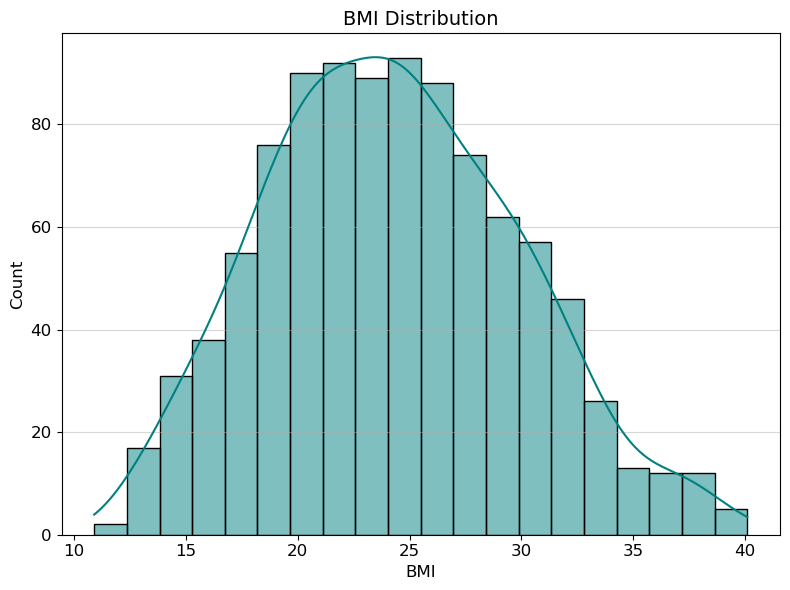

In [6]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for BMI distribution
def plot_bmi_distribution():
    """
    Creates a histogram of the BMI distribution with a kernel density estimate (KDE) overlay.

    This function visualizes the distribution of the 'bmi' column from the dataset.
    The plot includes a histogram with bins, a KDE for smoothing, and grid lines for better visualization.
    It provides a clear view of the frequency of different BMI values in the dataset.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(8, 6))

    # genreate histogram using seaborn
    sns.histplot(df["bmi"], kde=True, bins=20, color="teal", edgecolor='black', zorder=1)

    # Title and labels
    plt.title("BMI Distribution", fontsize=14)
    plt.xlabel("BMI", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', alpha=0.5, zorder=3)

    # show the plot
    plt.tight_layout()
    plt.show()

# Load the dataset
df = pd.read_csv("diabetes_data_cleaned.csv")

# Call the function to create the plot
plot_bmi_distribution()

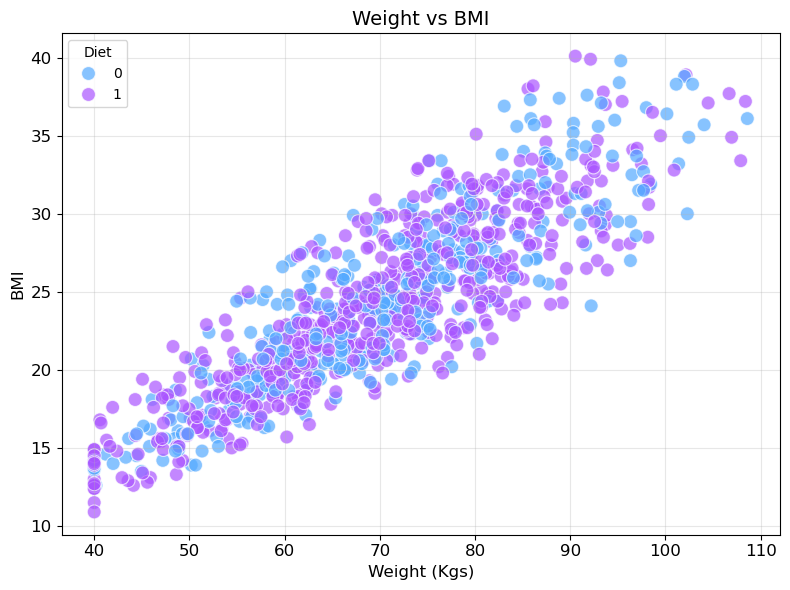

In [7]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for scatter plot
def plot_scatter():
    """
    Creates a scatter plot of Physical Activity vs Blood Glucose .

    This function visualizes the relationship between physical activity and blood glucose levels
    across different diets. The plot includes a scatter plot of data points with a color legend to
    differentiate diets.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(8, 6))

    # Generate scater plot using seaborn
    sns.scatterplot(data=df, x="weight", y="bmi", hue="diet", palette="cool",s=100, alpha=0.7, legend='full')

    # Title and labels
    plt.title("Weight vs BMI", fontsize=14)
    plt.xlabel("Weight (Kgs)", fontsize=12)
    plt.ylabel("BMI", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.3, zorder=3)
    plt.legend(title='Diet')
    plt.tight_layout()

    # Show the plot
    plt.show()

# Load the dataset
df = pd.read_csv("diabetes_data_cleaned.csv")

# Call the function to create the plot
plot_scatter()


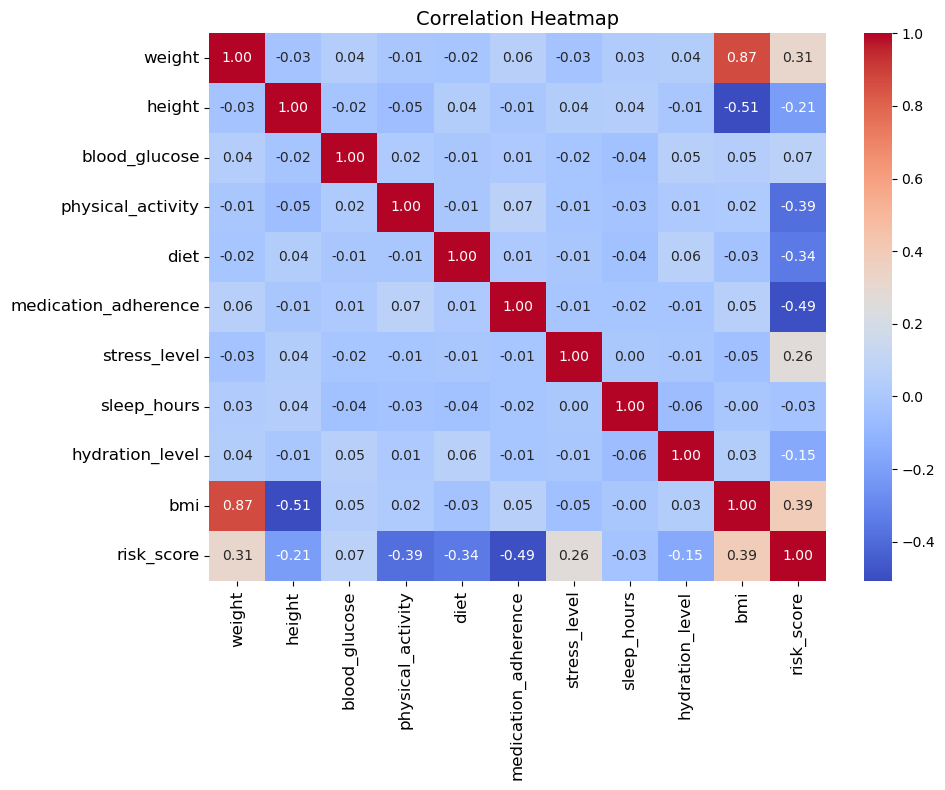

In [8]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function for Heatmap
def plot_heatmap():
    """
    Creates a heatmap to visualize the correlation matrix of the dataset.

    This function calculates the correlation matrix for all numeric columns in the dataset,
    excluding 'user_id' and 'date'. It then plots the heatmap using Seaborn to display
    correlations between variables with a color scale. The heatmap includes annotations for
    each cell to show the correlation value.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(10, 8))
    correlation = df.drop(columns=["user_id", "date"]).corr()  # Compute correlation matrix
    sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm") # Plot heatmap with annotations and color scale
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title("Correlation Heatmap", fontsize=14)
    plt.tight_layout()
    plt.show()

# Load the dataset
df = pd.read_csv("diabetes_data_cleaned.csv")

# Call the function to create the plot
plot_heatmap()


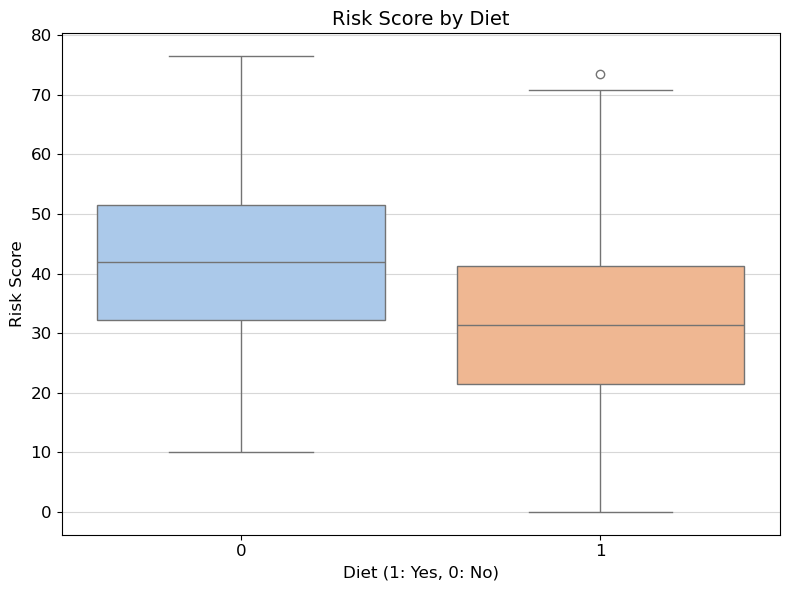

In [9]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Box Plot function
def plot_boxplot():
    """
    Creates a boxplot to compare the distribution of risk scores across different diet adherence levels.

    This function uses a boxplot to visualize how the risk score varies between different levels of diet adherence.
    It provides a clear visual distinction between diet adherence (1 for 'Yes', 0 for 'No') and the corresponding
    distribution of risk scores. The plot helps in understanding the impact of diet adherence on risk scores.

    Returns:
    - None: Displays the plot using matplotlib.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x="diet", y="risk_score", palette="pastel", legend=True)
    plt.title("Risk Score by Diet", fontsize=14)
    plt.xlabel("Diet (1: Yes, 0: No)", fontsize=12)
    plt.ylabel("Risk Score", fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# Load the dataset
df = pd.read_csv("diabetes_data_cleaned.csv")

# Call the function to create the plot
plot_boxplot()


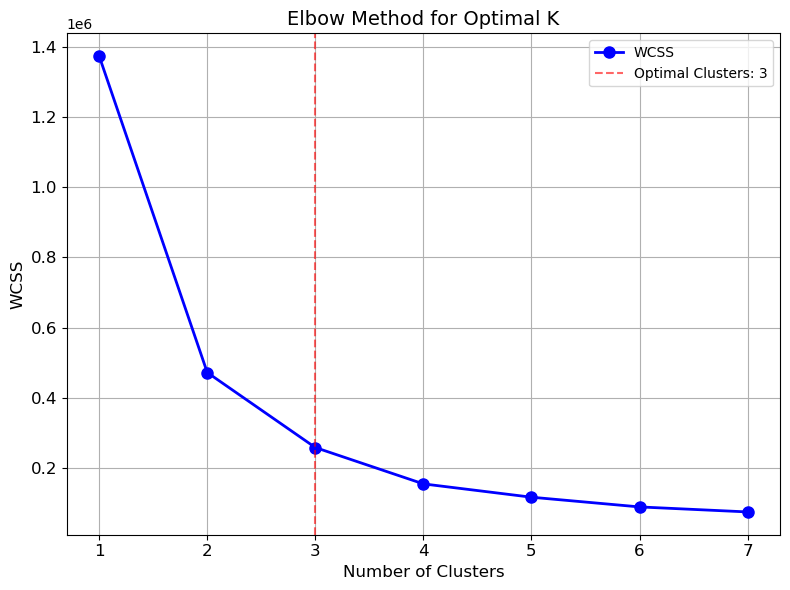

In [10]:
# import required libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Prepare the data
X = df[["bmi", "blood_glucose"]].dropna()

# Calculate WCSS for a range of cluster numbers
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Define the optimal number of clusters
optimal_clusters = 3

# Plot the Elbow Method with dots
plt.figure(figsize=(8, 6))
plt.plot(range(1, 8), wcss, marker='o', markersize=8, color='b', linestyle='-', linewidth=2, label='WCSS')
plt.axvline(x=3, color='red', linestyle='--', alpha=0.6, label=f'Optimal Clusters: {optimal_clusters}')
plt.title('Elbow Method for Optimal K', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [11]:
# Create a function for clustering returns only values
def kmeans_clustering(data, n_clusters=3):
    """
    KMeans clustering and return the fitted model and cluster predictions.

    Parameters:
    - data: DataFrame containing the features for clustering (must be numeric).
    - n_clusters: Number of clusters for the KMeans model (default: 3).

    Returns:
    - kmeans: Fitted KMeans model.
    - y_kmeans: Predicted cluster labels for each data point.
    """
    # Fit the KMeans model and predict clusters
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(data)
    return kmeans, y_kmeans

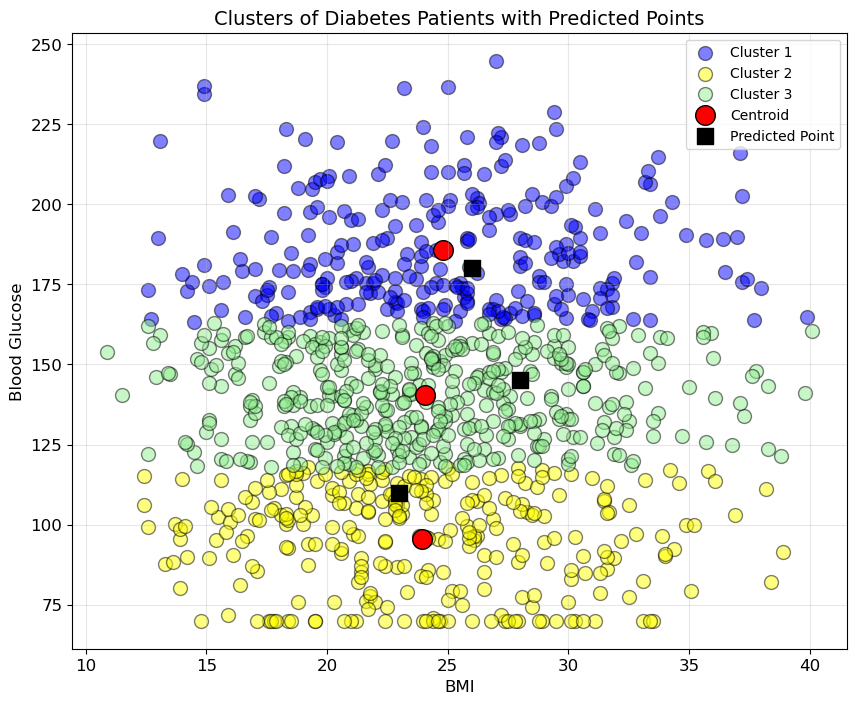

In [12]:
def cluster_plot(X, y_kmeans, kmeans, predicted_points):
    """
    Plot the clusters, their centroids, and the predicted points with appropriate cluster assignments.

    Parameters:
    - X: DataFrame or numpy array containing the features.
    - y_kmeans: Cluster labels from the KMeans model.
    - kmeans: The fitted KMeans model.
    - predicted_points: New points to be predicted and plotted (should have 2 features).
    """
    # Plotting the existing clusters
    plt.figure(figsize=(10, 8))
    plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], s=100, c='blue', label='Cluster 1', alpha=0.5, edgecolor='k')
    plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], s=100, c='yellow', label='Cluster 2', alpha=0.5, edgecolor='k')
    plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], s=100, c='lightgreen', label='Cluster 3', alpha=0.5, edgecolor='k')

    # Plotting the centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='o', c='red', label='Centroid', edgecolor='k')
    
    # Predicting the clusters for the new points
    predicted_labels = kmeans.predict(predicted_points)

    # Plotting the predicted points with labels
    for i, point in enumerate(predicted_points):
        plt.scatter(point[0], point[1], s=130, marker='s', c='black', 
                    label=f'Predicted Point' if i == 0 else "", edgecolor='k')

    # Title and labels
    plt.title('Clusters of Diabetes Patients with Predicted Points', fontsize=14)
    plt.xlabel('BMI', fontsize=12)
    plt.ylabel('Blood Glucose', fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(alpha=0.3)
    plt.savefig('Cluster.png', bbox_inches='tight')
    # Legend
    plt.legend()
    plt.show()

# Use only the 'bmi' and 'blood_glucose' features for clustering and prediction
X = df[['bmi', 'blood_glucose']].dropna()  # Select relevant columns and remove missing values

# Perform KMeans clustering
kmeans, y_kmeans = kmeans_clustering(X)

# Predicted points (new data points to classify)
predicted_points = np.array([
    [28, 145],  # predicted point 1
    [26, 180],  # predicted point 2
    [23, 110]   # predicted point 3
])

# Call the function to plot the clusters with predicted points
cluster_plot(X, y_kmeans, kmeans, predicted_points)

In [13]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy import stats

# Perform linear regression only return the values
def linear_regression(data, x_feature, y_feature):
    """
    Perform linear regression on the given data.

    Parameters:
    data (pd.DataFrame): The dataset containing the features.
    x_feature (str): The name of the independent variable (feature).
    y_feature (str): The name of the dependent variable (target).

    Returns:
    model (LinearRegression): The fitted linear regression model.
    predictions (np.ndarray): The predicted values from the model.
    errors (np.ndarray): The residuals (errors) between the actual and predicted values.
    """
    # Prepare data
    X = data[[x_feature]].values  # Independent variable
    y = data[y_feature].values   # Dependent variable
    
    # Initialize the model and fit it
    model = LinearRegression()
    model.fit(X, y)
    
    # Get predictions
    predictions = model.predict(X)
    
    # Calculate errors (residuals)
    errors = y - predictions
    
    return model, predictions, errors

In [14]:
# Function to calculate the prediction interval
def prediction_interval(X, predictions, errors, confidence=0.95):
    """
    Calculate the prediction interval for a set of predictions.

    Parameters:
    X (np.ndarray): The independent variable values.
    predictions (np.ndarray): The predicted values from the regression model.
    errors (np.ndarray): The residuals (errors) between the actual and predicted values.
    confidence (float): The confidence level for the prediction interval (default is 0.95).

    Returns:
    lower_bound (np.ndarray): The lower bound of the prediction interval.
    upper_bound (np.ndarray): The upper bound of the prediction interval.
    """
    # Calculate standard error of the predictions
    n = len(X)  # number of data points
    mse = np.mean(errors ** 2)  # Mean Squared Error
    se = np.sqrt(mse * (1 + 1/n + (X - X.mean())**2 / np.sum((X - X.mean())**2)))  # Standard error of predictions
    
    # Calculate t-score for the given confidence level
    t_score = stats.t.ppf(1 - (1 - confidence) / 2, df=n - 2)
    
    # Calculate the prediction interval
    margin_of_error = t_score * se
    lower_bound = predictions - margin_of_error
    upper_bound = predictions + margin_of_error
    
    return lower_bound, upper_bound

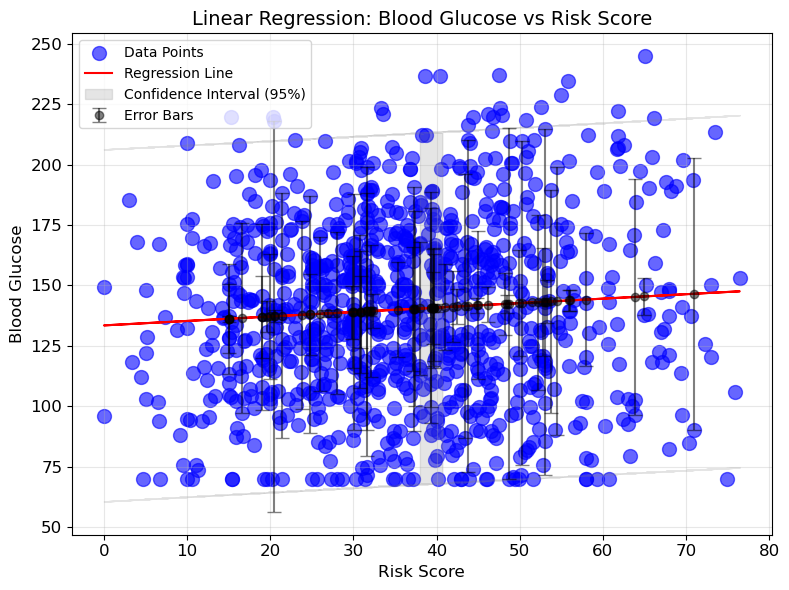

In [15]:
# Function to plot the regression line, data points, error bars, and confidence interval
def plot_regression_line(data, x_feature, y_feature, predictions, errors, lower_bound, upper_bound, error_bar_step=15):
    """
    Plot the data points, regression line, confidence interval, and fewer error bars.
    """
    # Ensure errors are non-negative 
    errors = np.abs(errors)
    
    # Select every 'error_bar_step' point to show error bars
    indices_with_error_bars = range(0, len(data), error_bar_step)
    
    # Create the plot
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of original data points
    plt.scatter(data[x_feature], data[y_feature], color='blue', label='Data Points', s=100, alpha=0.6)
    
    # Plot the regression line
    plt.plot(data[x_feature], predictions, color='red', label='Regression Line')
    
    # Add confidence interval as shaded region
    plt.fill_between(data[x_feature], lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval (95%)')
    
    # Add error bars to the selected data points (using errors)
    plt.errorbar(data[x_feature].iloc[indices_with_error_bars], 
                 predictions[indices_with_error_bars], 
                 yerr=errors[indices_with_error_bars], 
                 fmt='o', color='black', alpha=0.5, label='Error Bars', capsize=5)

    # Add labels and title
    plt.title(f"Linear Regression: {y_feature.replace('_',' ').title()} vs {x_feature.replace('_',' ').title()}", fontsize=14)
    plt.xlabel(x_feature.replace('_',' ').title(), fontsize=12)
    plt.ylabel(y_feature.replace('_',' ').title(), fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add a legend
    plt.legend()
    
    # Show grid and plot
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('Regress.png')
    plt.show()

# Load the dataset
df = pd.read_csv("diabetes_data_cleaned.csv")

# Define the feature columns
x_feature = "risk_score"   # Independent variable (X)
y_feature = "blood_glucose"  # Dependent variable (Y)

# Perform linear regression
model, predictions, errors = linear_regression(df, x_feature, y_feature)

# confidence interval
lower_bound, upper_bound = prediction_interval(df[x_feature].values, predictions, errors, confidence=0.95)

# Plot the regression line with confidence interval and error bars visible 
plot_regression_line(df, x_feature, y_feature, predictions, errors, lower_bound, upper_bound, error_bar_step=15)  